In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
tenure_exited_yes = df[df.Exited == 1].Tenure
tenure_exited_no = df[df.Exited == 0].Tenure

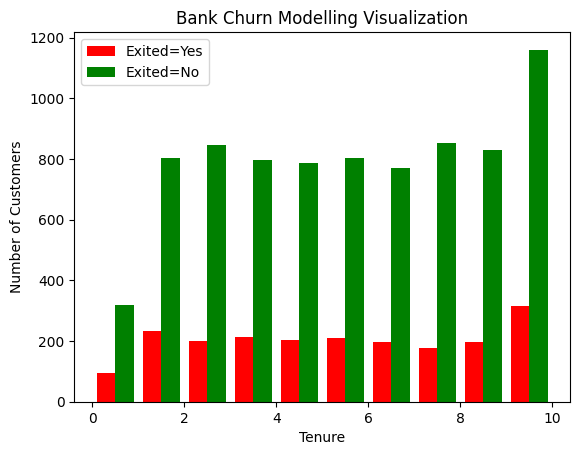

In [7]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Bank Churn Modelling Visualization")

plt.hist([tenure_exited_yes, tenure_exited_no], color=['red', 'green'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

In [8]:
CreditScore_exited_yes = df[df.Exited == 1].CreditScore
CreditScore_exited_no = df[df.Exited == 0].CreditScore

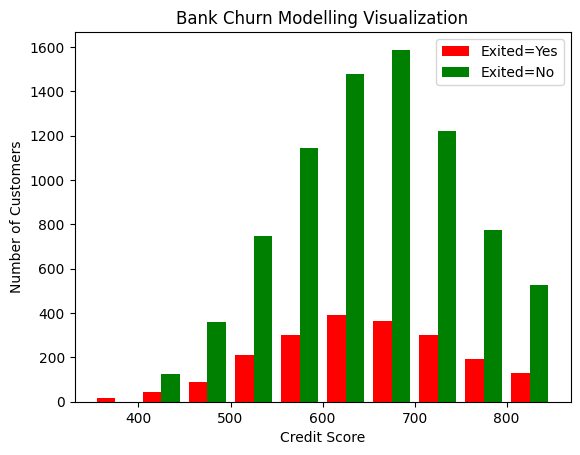

In [9]:
plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.title("Bank Churn Modelling Visualization")

plt.hist([CreditScore_exited_yes, CreditScore_exited_no], color=['red', 'green'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

In [10]:
Balance_exited_yes = df[df.Exited == 1].Balance
Balance_exited_no = df[df.Exited == 0].Balance

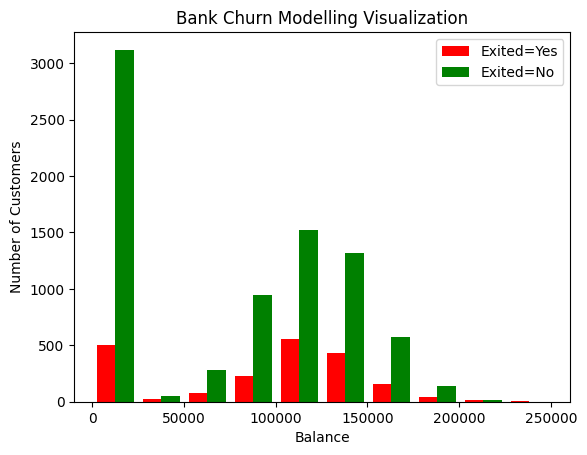

In [11]:
plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.title("Bank Churn Modelling Visualization")

plt.hist([Balance_exited_yes, Balance_exited_no], color=['red', 'green'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

In [12]:
EstimatedSalary_exited_yes = df[df.Exited == 1].EstimatedSalary
EstimatedSalary_exited_no = df[df.Exited == 0].EstimatedSalary

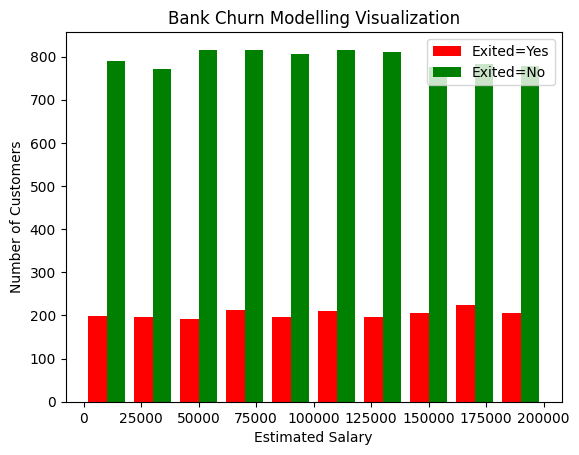

In [13]:
plt.xlabel("Estimated Salary")
plt.ylabel("Number of Customers")
plt.title("Bank Churn Modelling Visualization")

plt.hist([EstimatedSalary_exited_yes, EstimatedSalary_exited_no], color=['red', 'green'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [16]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [17]:
df2 = pd.get_dummies(data=df, columns=['Geography'], dtype='uint8')
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [18]:
df2.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9037,653,1,41,1,104584.11,1,1,0,15126.32,1,0,1,0
7894,706,1,67,1,123276.69,2,1,1,86507.88,1,0,1,0
4649,670,1,31,1,142631.54,2,1,1,175894.24,0,0,1,0


In [19]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [22]:
df2.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
515,0.886,1,0.270270,0.9,0.0,0.333333,1,0,0.441109,0,0,0,1
1800,0.726,0,0.554054,0.3,0.0,0.333333,1,1,0.313472,0,1,0,0
7823,0.710,1,0.189189,0.7,0.0,0.333333,1,0,0.039554,0,1,0,0


In [23]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [43]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
# Class imbalance
print(f"Exited: {y.value_counts()[1] * 100 / y.shape[0]}%")
print(f"Not Exited: {y.value_counts()[0] * 100 / y.shape[0]}%")

Exited: 20.37%
Not Exited: 79.63%


### Build a model (ANN) in tensorflow/keras

In [32]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [44]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Input(shape=(12,)),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [47]:
y_test.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

### Training model without handling data imbalance

In [48]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7954 - loss: 0.5478
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8024 - loss: 0.4652
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8068 - loss: 0.4532
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8065 - loss: 0.4413
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8087 - loss: 0.4394
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8103 - loss: 0.4283
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8168 - loss: 0.4196
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8187 - loss: 0.4123
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8171 - loss: 0.4161
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8254 - loss: 0.3955
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 0.3887
Epoch 12/100
250/250 

## Mitigating Skewdness of Data

### Method 1: Undersampling

In [49]:
# Class count
count_class_0, count_class_1 = df2.Exited.value_counts()

# Divide by class
df_class_0 = df2[df2.Exited == 0]
df_class_1 = df2[df2.Exited == 1]

In [50]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [51]:
X = df_test_under.drop('Exited', axis=1)
y = df_test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [52]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5045 - loss: 0.6891
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6191 - loss: 0.6607
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6258 - loss: 0.6449
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6536 - loss: 0.6304
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6566 - loss: 0.6201
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6714 - loss: 0.6055
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6841 - loss: 0.5957
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.7325 - loss: 0.5566
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7224 - loss: 0.5630
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7327 - loss: 0.5524
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7218 - loss: 0.5473
Epoch 12/100
102/102 ━━━━━━━━━━

### Method 2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test_over.Exited.value_counts())

Random under-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [58]:
X = df_test_over.drop('Exited', axis=1)
y = df_test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.5804 - loss: 0.6743
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6740 - loss: 0.6137
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7070 - loss: 0.5679
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7345 - loss: 0.5408
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7406 - loss: 0.5178
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7656 - loss: 0.4956
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7571 - loss: 0.4923
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7719 - loss: 0.4754
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7716 - loss: 0.4720
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7728 - loss: 0.4695
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7682 - loss: 0.4692
Epoch 12/100
399/399 ━━━━━━

### Method3: SMOTE

In [61]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

print('SMOTE over-sampling:')
print(y_sm.value_counts())

SMOTE over-sampling:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5751 - loss: 0.6747
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6704 - loss: 0.6114
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.5724
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7264 - loss: 0.5493
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7414 - loss: 0.5341
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7471 - loss: 0.5243
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7517 - loss: 0.5156
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.7573 - loss: 0.5044
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7586 - loss: 0.5026
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.4926
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7627 - loss: 0.4896
Epoch 12/100
399/399 ━━━━━━━━

### Method4: Use of Ensemble with undersampling

In [65]:
df2.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [66]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [69]:
vc = y_train.value_counts()
vc

Exited
0    6370
1    1630
Name: count, dtype: int64

In [70]:
print(f"Ensemble model count {round(vc[0] / vc[1])}")

Ensemble model count 4


#### Data distribution for Ensemble models

model1 ---> class1(1630) + class0(0, 1630)

model2 ---> class1(1630) + class0(1631, 3260)

model3 ---> class1(1630) + class0(3261, 4890)

model4 ---> class1(1630) + class0(4891, 6370)

In [73]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [74]:
df3.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0


In [75]:
df3_class0 = df3[df3.Exited == 0]
df3_class1 = df3[df3.Exited == 1]

In [76]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [80]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1630)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5019 - loss: 0.7002
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6325 - loss: 0.6581
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6454 - loss: 0.6391
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6546 - loss: 0.6255
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.6699 - loss: 0.6179
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6806 - loss: 0.6068
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6850 - loss: 0.5970
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6961 - loss: 0.5831
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6955 - loss: 0.5880
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7177 - loss: 0.5702
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7235 - loss: 0.5562
Epoch 12/100
102/102 ━━━━━━

In [81]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1631, 3260)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.5550 - loss: 0.6930
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5932 - loss: 0.6721
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6465 - loss: 0.6433
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6756 - loss: 0.6101
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6890 - loss: 0.5930
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6746 - loss: 0.5951
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - loss: 0.5740
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6915 - loss: 0.5789
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7008 - loss: 0.5764
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6990 - loss: 0.5676
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7106 - loss: 0.5649
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━

In [82]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 3261, 4890)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4975 - loss: 0.7043
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.6180 - loss: 0.6552
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6587 - loss: 0.6263
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6867 - loss: 0.6060
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6887 - loss: 0.6047
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6987 - loss: 0.5922
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7085 - loss: 0.5823
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7193 - loss: 0.5725
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6960 - loss: 0.5867
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.5789  
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7215 - loss: 0.5628
Epoch 12/100
102/102 ━━━━━━━━━━━━━━

In [83]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 4891, 6370)
y_pred4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.5794 - loss: 0.6743
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.6395 - loss: 0.6400
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.6197
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6677 - loss: 0.6061
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6844 - loss: 0.5916
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6958 - loss: 0.5805
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.6832 - loss: 0.5942
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7111 - loss: 0.5718
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.6992 - loss: 0.5684
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7107 - loss: 0.5598
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7172 - loss: 0.5551
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [84]:
len(y_pred1)

2000

In [85]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
    if n_ones >= 2:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [86]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1593
           1       0.45      0.80      0.58       407

    accuracy                           0.76      2000
   macro avg       0.69      0.78      0.71      2000
weighted avg       0.84      0.76      0.78      2000

